In [1]:
import collections
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if os.getcwd().endswith('notebook'):
    os.chdir('..')

In [2]:
sns.set(palette='colorblind', font_scale=1.3)

In [6]:
categories = ['psychrophilic', 'mesophilic', 'thermophilic', 'hyperthermophilic']

In [3]:
dataset_path = os.path.join(os.getcwd(), 'data/ncbi/dataset.csv')

In [4]:
dataset_df = pd.read_csv(dataset_path)

In [5]:
dataset_df.head()

,specie_name,seqid,gene_name,start_inclusive,end_exclusive,length,strand,temperature,temperature_range,sequence
0,Acetobacter aceti,NZ_CP014692.1,rnpB,888876,889266,390,-,26.0,mesophilic,CCAGACGGTCGGGCGATCGCTGTTGCCTTTCAGGTGATGGAGGAAA...
1,Acetobacter aceti,NZ_CP014692.1,ssrA,1260173,1260502,329,+,26.0,mesophilic,GACCTTGCGGAAGGTGATGCATACCCCTATCTTCATGAGTGCAGGA...
2,Acetobacter aceti,NZ_CP014692.1,ffs,2223427,2223522,95,-,26.0,mesophilic,AGAGGCCTGTGATGGACGGGCGCCTTGCCAACCCGGTCAGATCCGG...
3,Acetobacter aceti,NZ_CP014692.1,rrf,2846207,2846323,116,-,26.0,mesophilic,CCTGGTGGCTATGGCGGGGAGAGATCCACCCGATCCCATCCCGAAC...
4,Acetobacter cerevisiae,NZ_LHZA01000109.1,efp,9288,9855,567,+,26.0,mesophilic,ATGAAACAGCAGGCGAACCTGATCCGGGCCGGACAGGTCATCGAGC...


In [16]:
def plot_genes_distribution(dataset_df, categories):    
    genes = dataset_df['gene_name'].unique()
    n_genes = len(genes)
    n_categories = len(categories)
    
    f, axes = plt.subplots(n_genes, n_categories, figsize=(16, 5 * n_genes))
    
    for i, gene in enumerate(genes):
        for j, cat in enumerate(categories):
            ax = axes[i, j]
            df = dataset_df[(dataset_df['gene_name'] == gene) & (dataset_df['temperature_range'] == cat)]
            df['temperature'].hist(ax=ax)
            if j == 0:
                ax.set_title(f'{gene} | {cat}')
            else:
                ax.set_title(cat)

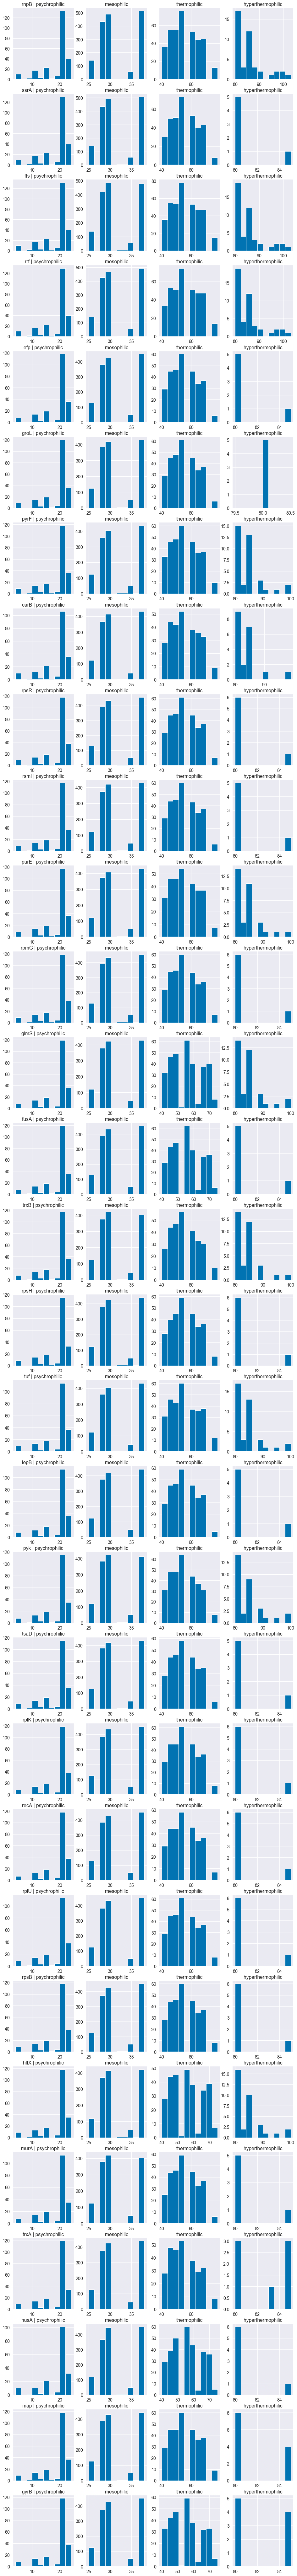

In [17]:
plot_genes_distribution(dataset_df, categories)

In [24]:
for cat in categories:
    print(cat, len(dataset_df[dataset_df['temperature_range'] == cat]))

psychrophilic 6169
mesophilic 43335
thermophilic 9278
hyperthermophilic 534
